# Lab 4: Maximum Likelihood Estimation

**Author:** Alex Feucht

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Practice different estimation methods to find the best PDF for mass distribution data

In this lab, we will analyze a mass distribution dataset using the **Cauchy distribution** (also known as Lorentz or Breit-Wigner distribution). The Cauchy distribution has two parameters:
- **Location parameter (m)**: central mass value
- **Scale parameter (Γ)**: width of the distribution

**Documentation:** [scipy.stats.cauchy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html)

## Setup and Data

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import cauchy

In [ ]:
# Mass distribution dataset (Units: GeV)
mass = [7.95442531, 10.60408232, 9.9020277, 10.42288788, 17.2193401, 10.06076572,
        10.00176003, 7.8289388, 9.55481385, 9.99981543, 10.3156156, 10.70547087,
        9.80374407, 7.62085689, 9.60747351]

**Your theoretical prediciton**
- What Cauchy distribution is it? Try many centers and widths to match the data!

# Task 1: Visualization (3 points)

Create two types of visualizations for the mass distribution data.

## Part (a): Unbinned Distribution

Draw the unbinned mass distribution showing individual data points as a scatter plot.

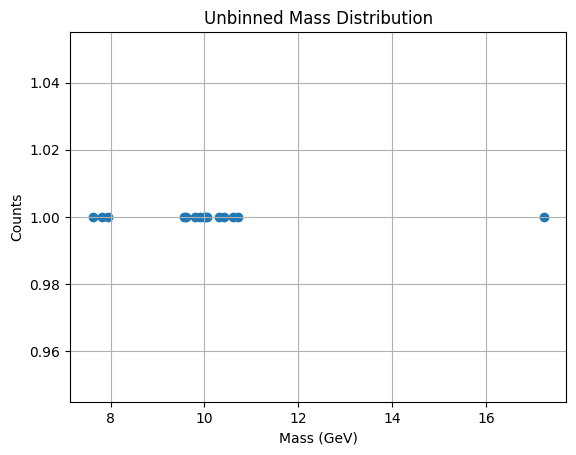

In [ ]:
# TODO: Create a scatter plot showing individual mass measurements

plt.figure()
plot = plt.subplot()
plot.set_xlabel("Mass (GeV)")
plot.set_ylabel("Counts")
plot.set_title("Unbinned Mass Distribution")
plot.scatter(mass, np.ones_like(mass)) # Plot mass vs a constant y-value to represent each point
plt.grid(True)
plt.show()

## Part (b): Binned Distribution with Error Bars

Create a histogram with bin size 0.5 GeV (range 0-20 GeV) including Poisson error bars.

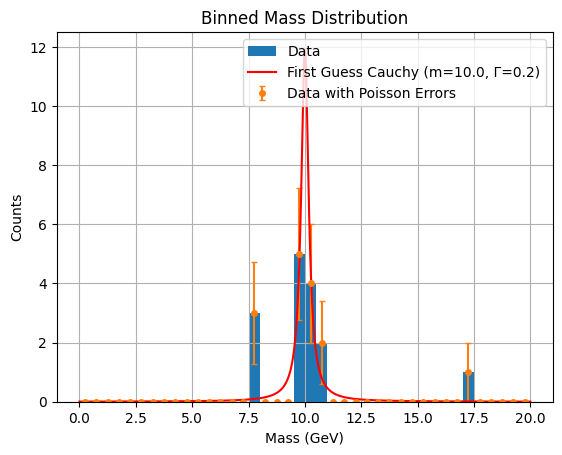

In [ ]:
# TODO: Create histogram with error bars (use sqrt(N) for Poisson errors)
# TODO: Overplot your theoretical Cauchy PDF match histogram (scales from probability to expected counts per bin)

# Create a histogram with bin size 0.5 GeV (range 0-20 GeV)
plt.figure()
# plot = plt.hist(mass, bins=np.arange(0, 20.5, 0.5), label="Data")
counts, bin_edges, _ = plt.hist(mass, bins=np.arange(0, 20.5, 0.5), label="Data")
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errors = np.sqrt(counts)
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', markersize=4, capsize=2, label='Data with Poisson Errors')

plot = plt.subplot()
plot.set_xlabel("Mass (GeV)")
plot.set_ylabel("Counts")
plot.set_title("Binned Mass Distribution")
plt.grid(True)

# Overplot Cauchy PDF - First guess
theoretical_m = 10.0 # Example theoretical mass
theoretical_gamma = 0.2 # Example theoretical width
x = np.linspace(0, 20, 1000)
pdf = cauchy.pdf(x, loc=theoretical_m, scale=theoretical_gamma)

# Scale PDF to match histogram
bin_width = bin_edges[1] - bin_edges[0]
scaled_pdf = pdf * len(mass) * bin_width

plt.plot(x, scaled_pdf, label=f'First Guess Cauchy (m={theoretical_m}, Γ={theoretical_gamma})', color='red')

plt.legend()
plt.show()

# Task 2: Maximum Likelihood Estimation (4 points)

Use maximum likelihood estimation to find the best-fit parameters for the Cauchy distribution.

## Part (a): Negative Log-Likelihood Function

Construct an unbinned negative log-likelihood function that returns -2*log(L) for the Cauchy distribution.

In [ ]:
# TODO: Create your NLL function. HINT: Calculate log-likelihood using scipy.stats.cauchy.logpdf

def NLLfunc(params, data):
  m, gamma = params
  # Calculate the log probability density for each data point
  log_likelihood = cauchy.logpdf(data, loc=m, scale=gamma)
  # Return -2 times the sum of the log likelihoods
  return -2 * np.sum(log_likelihood)

## Part (b): Parameter Space Scanning

Perform a grid search over the (mass, width) parameter space to find the minimum NLL.

In [ ]:
# TODO: Define parameter ranges

# TODO: Create range around expected mass value
mass_range = np.linspace(9.5, 10.5, 100) # Example range, adjust as needed

# TODO: Create range for width parameter
width_range = np.linspace(0.1, 1.0, 100) # Example range, adjust as needed

# TODO: Create parameter grids using np.meshgrid
M, G = np.meshgrid(mass_range, width_range)

# TODO: Calculate NLL for each parameter combination
NLL = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        NLL[i, j] = NLLfunc([M[i, j], G[i, j]], mass)

# TODO: Find minimum and extract best-fit parameters
min_NLL_index = np.unravel_index(np.argmin(NLL), NLL.shape)
best_fit_m = M[min_NLL_index]
best_fit_gamma = G[min_NLL_index]
min_NLL = NLL[min_NLL_index]

print(f"Best-fit mass (m): {best_fit_m:.4f}")
print(f"Best-fit width (Γ): {best_fit_gamma:.4f}")
print(f"Minimum NLL: {min_NLL:.4f}")

Best-fit mass (m): 9.9949
Best-fit width (Γ): 0.4091
Minimum NLL: 50.2755


## Part (c): 2D Contour Plot

Create a 2D contour plot showing the NLL landscape with contour levels up to min_nll + 5.

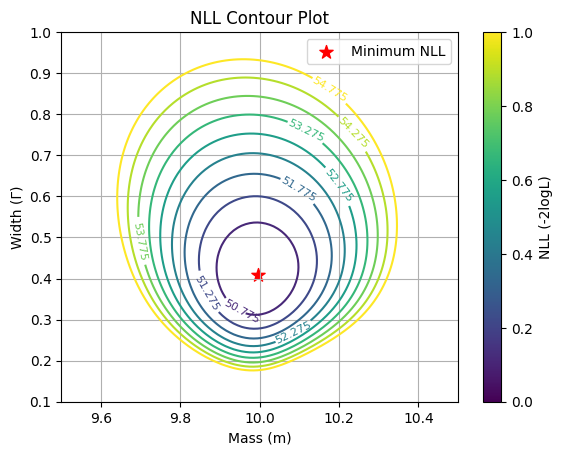

In [ ]:
# TODO: Create 2D contour plot of NLL
# TODO: Mark the minimum point
# TODO: Add appropriate labels and colorbar

plt.figure()
contour_levels = np.arange(min_NLL, min_NLL + 5, 0.5) # Contour levels up to min_nll + 5
contour = plt.contour(M, G, NLL, levels=contour_levels)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(best_fit_m, best_fit_gamma, color='red', marker='*', s=100, label='Minimum NLL') # Mark the minimum point

plt.xlabel("Mass (m)")
plt.ylabel("Width (Γ)")
plt.title("NLL Contour Plot")
plt.colorbar(label="NLL (-2logL)")
plt.legend()
plt.grid(True)
plt.show()

## Bonus: 3D Surface Plot (2 points)


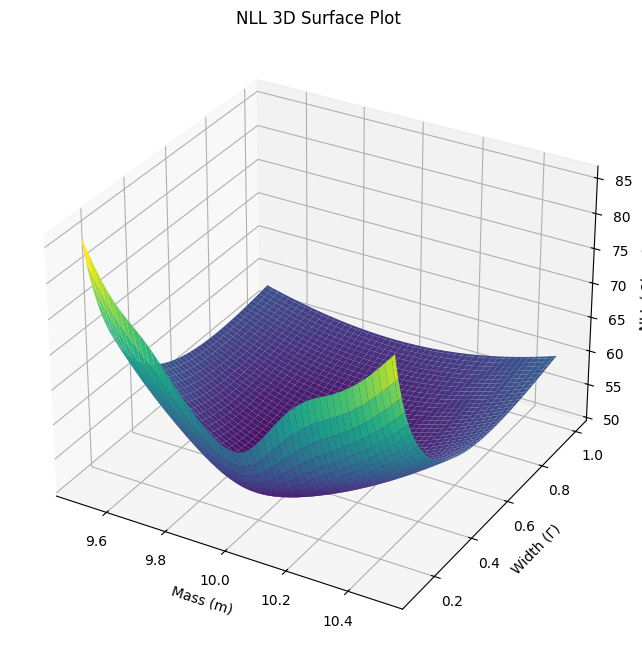

In [ ]:
# TODO: Create 3D surface plot of NLL

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, G, NLL, cmap='viridis')

ax.set_xlabel("Mass (m)")
ax.set_ylabel("Width (Γ)")
ax.set_zlabel("NLL (-2logL)")
ax.set_title("NLL 3D Surface Plot")

plt.show()

## Part (d): Data with Best-Fit PDF

Plot the histogram overlaid with the theoretical Cauchy distribution using best-fit parameters.

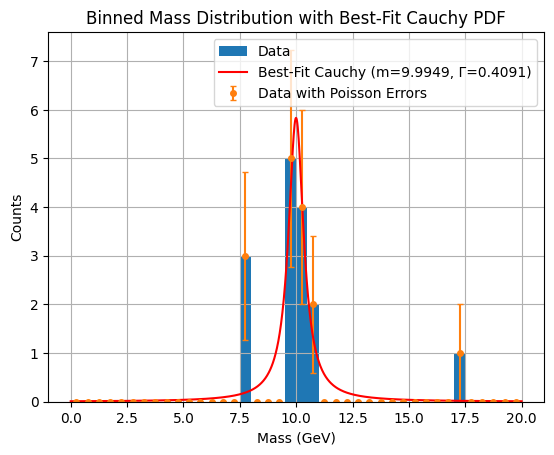

In [ ]:
# TODO: Plot histogram of data
# TODO: Calculate and plot theoretical PDF using best-fit parameters
# TODO: Scale PDF to match histogram (scales from probability to expected counts per bin)

# Plot histogram of data
plt.figure()
counts, bin_edges, _ = plt.hist(mass, bins=np.arange(0, 20.5, 0.5), label="Data")
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errors = np.sqrt(counts)
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', markersize=4, capsize=2, label='Data with Poisson Errors')

# Calculate and plot theoretical PDF using best-fit parameters
# Using best_fit_m and best_fit_gamma obtained from the grid search
x = np.linspace(0, 20, 1000)
pdf = cauchy.pdf(x, loc=best_fit_m, scale=best_fit_gamma)

# Scale PDF to match histogram
bin_width = bin_edges[1] - bin_edges[0]
scaled_pdf = pdf * len(mass) * bin_width

plt.plot(x, scaled_pdf, label=f'Best-Fit Cauchy (m={best_fit_m:.4f}, Γ={best_fit_gamma:.4f})', color='red')

plt.xlabel("Mass (GeV)")
plt.ylabel("Counts")
plt.title("Binned Mass Distribution with Best-Fit Cauchy PDF")
plt.grid(True)
plt.legend()
plt.show()

# Task 3: Maximum Likelihood vs Chi-squared Method (3 points)

Compare maximum likelihood and chi-squared fitting methods by fixing the width parameter.

## Part (a): Likelihood Profile

Plot -2logL/L_max as a function of mass parameter with fixed width.

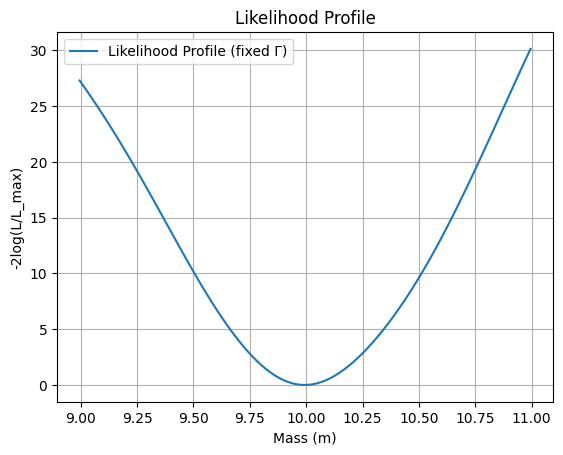

In [ ]:
# TODO: Fix width to your best-fit value
fixed_gamma = best_fit_gamma

# TODO: Scan mass parameter and calculate NLL profile
mass_scan_range = np.linspace(best_fit_m - 1.0, best_fit_m + 1.0, 100) # Scan around best-fit mass
nll_profile = [NLLfunc([m, fixed_gamma], mass) for m in mass_scan_range]

# TODO: Normalize by minimum and plot
min_nll_profile = np.min(nll_profile)
normalized_nll_profile = nll_profile - min_nll_profile

plt.figure()
plt.plot(mass_scan_range, normalized_nll_profile, label='Likelihood Profile (fixed Γ)')
plt.xlabel("Mass (m)")
plt.ylabel("-2log(L/L_max)")
plt.title("Likelihood Profile")
plt.grid(True)
plt.legend()
plt.show()

## Part (b): Chi-squared Method

Construct and minimize the chi-squared function for binned data.

In [ ]:
# TODO: Create your chi-squared function. Scan mass parameter for chi-squared
# TODO: Calculate Δχ² = χ²(m) - χ²_min

def chi_squared_func(m, data, bin_edges, fixed_gamma):
    counts, _ = np.histogram(data, bins=bin_edges)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]

    # Calculate expected counts from Cauchy distribution
    expected_counts = cauchy.pdf(bin_centers, loc=m, scale=fixed_gamma) * len(data) * bin_width

    # Avoid division by zero for bins with zero counts
    chi_squared = np.sum((counts - expected_counts)**2 / (expected_counts + 1e-9)) # Add a small epsilon to avoid division by zero
    return chi_squared

# Use the same bin edges as in the histogram
bin_edges = np.arange(0, 20.5, 0.5)

# Scan mass parameter for chi-squared with fixed gamma
chi_squared_values = [chi_squared_func(m, mass, bin_edges, fixed_gamma) for m in mass_scan_range]

# Calculate Delta chi-squared
min_chi_squared = np.min(chi_squared_values)
delta_chi_squared = chi_squared_values - min_chi_squared

## Part (c): Method Comparison

Compare maximum likelihood and chi-squared methods by plotting both profiles.

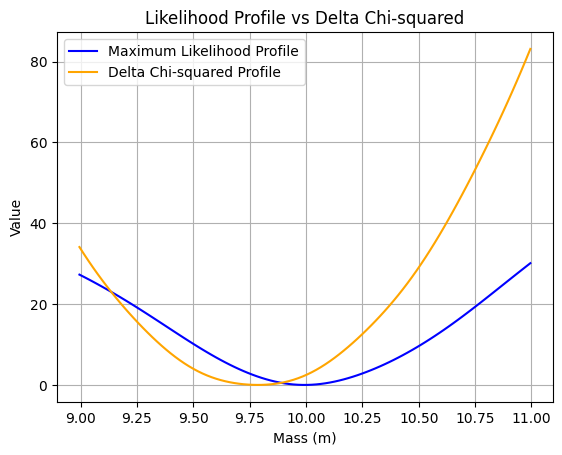

Minimum mass (Maximum Likelihood): 9.9848
Minimum mass (Chi-squared): 9.7828


In [ ]:
# TODO: Plot both curves on same axes
# - blue: Maximum Likelihood
# - orange: Chi-squared
# TODO: Compare the shape and minimum positions
# TODO: Add observations about which method is more precise

plt.figure()
plt.plot(mass_scan_range, normalized_nll_profile, label='Maximum Likelihood Profile', color='blue')
plt.plot(mass_scan_range, delta_chi_squared, label='Delta Chi-squared Profile', color='orange')

plt.xlabel("Mass (m)")
plt.ylabel("Value")
plt.title("Likelihood Profile vs Delta Chi-squared")
plt.grid(True)
plt.legend()
plt.show()

# Display minimum mass values
print(f"Minimum mass (Maximum Likelihood): {mass_scan_range[np.argmin(nll_profile)]:.4f}")
print(f"Minimum mass (Chi-squared): {mass_scan_range[np.argmin(chi_squared_values)]:.4f}")

# Bonus: Using iminuit Package (3 points)

Use the iminuit package for professional maximum likelihood fitting.

In [ ]:
# TODO: Install and import iminuit
try:
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    print("iminuit imported successfully!")
    IMINUIT_AVAILABLE = True
except ImportError:
    # print("Installing iminuit...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "iminuit"])
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    IMINUIT_AVAILABLE = True

## Implementation with iminuit

Use the iminuit package for professional maximum likelihood fitting with parameter errors.

┌───────┬───────────────┐
│       │      m  gamma │
├───────┼───────────────┤
│     m │ 0.0205  0.001 │
│ gamma │  0.001 0.0246 │
└───────┴───────────────┘
┌──────────┐
│          │
├──────────┤
│  Error   │
│  Valid   │
│ At Limit │
│ Max FCN  │
│ New Min  │
└──────────┘


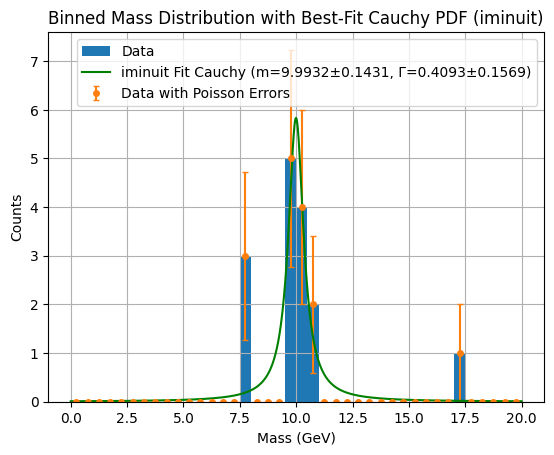

In [ ]:
# TODO: Define Cauchy PDF for iminuit
# TODO: Set up unbinned negative log-likelihood cost function
# TODO: Create Minuit object with initial parameter guesses
# TODO: Run the fit using migrad() and hesse()
# TODO: Display fit results in the histogram with parameter errors

# Define Cauchy PDF for iminuit
def cauchy_pdf_iminuit(x, m, gamma):
    return cauchy.pdf(x, loc=m, scale=gamma)

# Set up unbinned negative log-likelihood cost function
cost_func = UnbinnedNLL(mass, cauchy_pdf_iminuit)

# Create Minuit object with initial parameter guesses
# Use the best-fit parameters from the grid search as initial guesses
m = Minuit(cost_func, m=best_fit_m, gamma=best_fit_gamma)

# Run the fit using migrad() and hesse()
m.migrad() # Find the minimum
m.hesse() # Calculate the errors

# Print the fit results
print(m.covariance)
print(m.merrors)

# Display fit results in the histogram with parameter errors
plt.figure()
counts, bin_edges, _ = plt.hist(mass, bins=np.arange(0, 20.5, 0.5), label="Data")
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errors = np.sqrt(counts) # Calculate Poisson errors
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', markersize=4, capsize=2, label='Data with Poisson Errors')

# Calculate and plot theoretical PDF using iminuit best-fit parameters
x = np.linspace(0, 20, 1000)
pdf_iminuit = cauchy.pdf(x, loc=m.values['m'], scale=m.values['gamma'])

# Scale PDF to match histogram
bin_width = bin_edges[1] - bin_edges[0]
scaled_pdf_iminuit = pdf_iminuit * len(mass) * bin_width

plt.plot(x, scaled_pdf_iminuit, label=f'iminuit Fit Cauchy (m={m.values["m"]:.4f}±{m.errors["m"]:.4f}, Γ={m.values["gamma"]:.4f}±{m.errors["gamma"]:.4f})', color='green')


plt.xlabel("Mass (GeV)")
plt.ylabel("Counts")
plt.title("Binned Mass Distribution with Best-Fit Cauchy PDF (iminuit)")
plt.grid(True)
plt.legend()
plt.show()

# Discussion and Analysis

**Answer the following questions based on your results:**


## Task 2 Discussion: Maximum Likelihood Estimation

**Question 1:** Analyze your NLL contour plots and parameter estimation results. What does the shape of the contours tell you about parameter correlations? How sensitive is the fit to small changes in the mass and width parameters? Compare your best-fit parameters to your initial theoretical prediction from Task 1.

**Your Answer:** The shape of the NLL contour basically shows the minimalized value in a negative logarithmic scale of the likelihood of some parameter being correlated to distribution. The smaller the value, the better the fit of the data. So a very tightly packed set of contour lines shows a sharp descrease in likelihood, and a more spread out set of contours would be a more gradual descrease in likelihood of those parameters fitting. The fit seems to be more gradual for wider widths than smaller widths, judging based off of the contours being closer spaced toward the lower y values on the axis, and the change in mass or x values seems to have roughly a similar slope of the contour. This may mean that the system is more sensitive to smaller widths of data than wider widths, but roughly changes the same for inceases or decreases in mean mass. The central region of the contour is also more gradually spaced out, and towards the fringes the slopes become increasingly steep. This would be representative of a polynomial curve, in this case a parabola from two parameters, in the data of the NLL, which under the transformation out of log space would correspond to a flat line. The initial theoretical prediciton had a mass estimate of 10 and a width of 0.2, the best fit data had a mass of 9.9949 and a width of 0.4091, which is fairly close on the mass estimate but off by over a factor of 2 in the width estimate. This basically squished the plot of the best fit for counts down to a peak at under 6 compared to just under 12 for the original guess.

---

## Task 3 Discussion: Method Comparison

**Question 2:** Compare the likelihood profile and chi-squared methods. Which method gave a more precise estimate of the mass parameter? How do the shapes of the two curves differ near the minimum? Explain why the maximum likelihood method is generally preferred for small datasets like ours (15 data points).

**Your Answer:** The likelihood profile is closer to the best fit Cauchy PDF than the chi-squared method, differing in minimum mass by abs(9.9848-9.9932±0.1431) = 0.0084±0.1431 for likelihood and abs(9.7828-9.9932±0.1431) = 0.2104±0.1431 for chi-squared. This is over 25 times more of a difference for chi-squared from the best fit PDF we arrived at analytically through the iminuit Cauchy PDF, clearly making NLL a much closer estimate than chi-squared for this size of a dataset. NLL is within the margin of error of the iminuit value, but chi-squared is just outside of it. In the shape of the plots, NLL has less steep slopes, meaning more of the area around the minimum could fall within a best fit range. If we were to only use data with a value of 30 or less for best fit, NLL would have a much wider range of parameter space to work with when compared to chi-squared. The maximum likelihood method is generally preferred for smaller datasets because of the way it is modelled. Starting from a grid that fills out the parameter space, it performs a Cauchy PDF over that space for each point of mass data then keeps an integrated sum to find a minimal value for the NLL and gamma, then uses the minimal value as a normalization factor. It is sampling errors in the data at a much higher resolution than chi-squared, which uses expectation values for bins of mass data to form a histogram, normalized over the counts. Via the Central Limit Theorem, both will converge to a Normal Distribution eventually with large enough datasets, but for smaller ones, NLL scales more quickly to have a more flat distribution of the minimization values than chi-squared


---

## Model Comparison and Overall Analysis

**Question 3:** Compare all the fitting approaches you used (manual grid search, scipy optimization, and iminuit if completed). Did they all converge to the same parameter values? Which method was most efficient? Which provided the most complete uncertainty information?

**Your Answer:** - Parameter values for fitting aproaches -

Mass) Manual Grid Search: 9.9949 scipy optimization: NLL: 9.9848 Chi-Squared: 9.7828 iminuit: 9.9932±0.1431

Gamma) Manual Grid Search: 0.4091 scipy optimization: 0.4091 iminuit: 0.4093±0.1569 (note - Manual Grid Search and scipy both relied on the same fixed gamma value from finding it through a best fit method)

Iminuit seemed like the most efficient of all the methods to me. Not only was it highly precise, even including errors for each parameter, but it seems to have taken less code to get there than the more manually involved grid search methods. Cauchy scipy optimizations do seem to also be relatively easy to use and require less coding than the other methods, but perhaps there is a higher degree of uncertainty in the results compared to iminuit. Also, iminuit is able to find its own best fits for both parameters at once based off of arbitrary but close initial guesses of parameters, where others instead need a first guess to initialize a function search, or share a fixed gamma value between different methods in order to properly work, both of which are highly sensitive to initial guesses in a way that iminuit seems to work around. It might be harder to get the methods besides iminuit to work if one or more parameters are unknown from the dataset we are presented with to use.


## Submission Instructions

> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
>
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab4_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
>
> Make sure all cells have been executed and all outputs are visible before downloading!

In [ ]:
%%shell
jupyter nbconvert --to html /content/lab_4_AlexFeucht.ipynb

[NbConvertApp] Converting notebook /content/lab_4_AlexFeucht.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 973868 bytes to /content/lab_4_AlexFeucht.html
